21BCE3056 RUDRANIL GHOSH


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Mallcustomers.csv")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
df.drop(df.columns[0], axis=1, inplace=True)  # Drop the first column (index 0)
# Encode 'Gender' to numerical values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Visualize the data after preprocessing
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


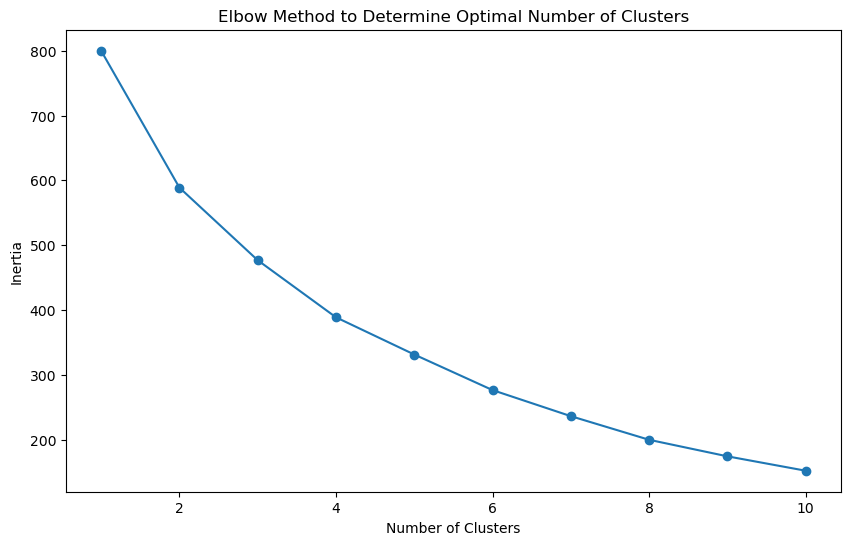

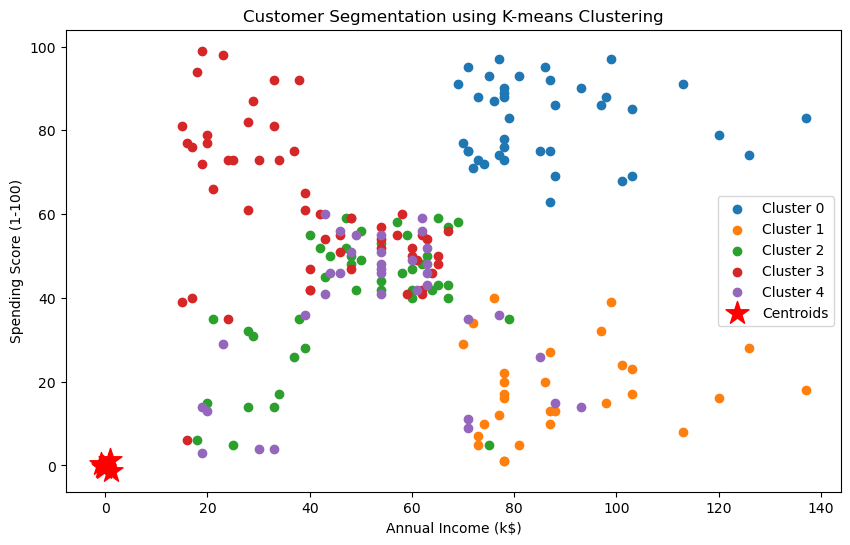

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  0.043390 -0.441917            0.991583                1.239503
1  0.016672 -0.169889            1.105281               -1.250054
2 -0.886405  0.786847           -0.432362               -0.393271
3 -0.065660 -1.000614           -0.795366                0.427181
4  1.128152  1.210294           -0.262388               -0.521318
3    54
2    43
0    39
4    35
1    29
Name: Cluster, dtype: int64


In [10]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Based on the Elbow Method, let's choose the optimal number of clusters (e.g., 5)
optimal_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Visualize the clustered data
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='*', 
            label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-means Clustering')
plt.legend()
plt.show()

# Print cluster centers and count of customers in each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])
print(cluster_centers)
print(df['Cluster'].value_counts())
